In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

BASEDIR = "/data1/shahs3/users/sunge/cnv_simulator"
DATADIR = f"{BASEDIR}/data"

In [2]:
group_num = 3

# Load the data
all_normal_cells = pd.read_csv(f"{DATADIR}/all_normal_cells.csv")
group_normal_cells = all_normal_cells[all_normal_cells["sample_group"] == group_num]
group_gc_metrics = pd.read_csv(f"{DATADIR}/normal_cell_gc_metrics/group_{group_num}_gc_metrics.csv")

In [3]:
group_normal_cells.head()

,cell_id,sample_id,library_id,patient_id,aliquot_id,condition,estimated_library_size,total_mapped_reads,total_reads,coverage_depth,coverage_breadth,expected,aligned,cell_barcode,sample_name,sample_group
2903,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN-130022A...,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN,130022A,SPECTRUM-OV-009,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN_130022A_L1,SPECTRUM-OV-009-RUQ,1775914,1296530,1526886,0.030360,0.029200,0.063600,0.051915,130022A-R42-C46,SHAH_H000013_T23_01_DLP01,3
2904,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN-130022A...,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN,130022A,SPECTRUM-OV-009,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN_130022A_L1,SPECTRUM-OV-009-RUQ,1608039,1127737,1304643,0.027335,0.026326,0.054531,0.045779,130022A-R42-C49,SHAH_H000013_T23_01_DLP01,3
2905,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN-130022A...,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN,130022A,SPECTRUM-OV-009,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN_130022A_L1,SPECTRUM-OV-009-RUQ,1633476,1037574,1207635,0.024828,0.023944,0.050181,0.041668,130022A-R42-C57,SHAH_H000013_T23_01_DLP01,3
2906,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN-130022A...,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN,130022A,SPECTRUM-OV-009,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN_130022A_L1,SPECTRUM-OV-009-RUQ,1796246,1488848,1707289,0.034905,0.033531,0.071502,0.060442,130022A-R42-C61,SHAH_H000013_T23_01_DLP01,3
2907,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN-130022A...,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN,130022A,SPECTRUM-OV-009,SPECTRUM-OV-009_S1_RIGHT_UPPER_ABDOMEN_130022A_L1,SPECTRUM-OV-009-RUQ,1701276,1128827,1276541,0.027018,0.026034,0.053302,0.045751,130022A-R43-C59,SHAH_H000013_T23_01_DLP01,3


In [4]:
print(group_gc_metrics.shape)
group_gc_metrics.head()

(925, 103)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,cell_barcode,sample_name
0,0.099972,0.069768,0.040452,0.015888,0.014787,0.101408,0.229320,0.118038,0.134514,0.091402,...,1.127974,31.770931,503.593838,461.661600,6615.669171,8596.274547,7160.759306,0.0,130022A-R42-C46,SHAH_H000013_T23_01_DLP01
1,0.057467,0.053474,0.000000,0.000000,0.017000,0.099930,0.117174,0.122134,0.178439,0.178639,...,3.025862,40.998675,549.942108,438.004658,8188.823255,8178.935760,9550.477506,0.0,130022A-R42-C49,SHAH_H000013_T23_01_DLP01
2,0.083285,0.000000,0.025275,0.019854,0.055434,0.018103,0.047761,0.044251,0.090512,0.137062,...,1.879395,42.942768,597.756086,512.492990,8178.990434,8199.717080,7328.866641,0.0,130022A-R42-C57,SHAH_H000013_T23_01_DLP01
3,0.159608,0.101261,0.000000,0.124520,0.115891,0.037847,0.144227,0.133628,0.090107,0.143272,...,3.274252,41.783027,582.027499,361.046036,8012.950086,6805.372687,10793.317553,0.0,130022A-R42-C61,SHAH_H000013_T23_01_DLP01
4,0.076550,0.000000,0.000000,0.054745,0.067934,0.033278,0.058531,0.013557,0.166384,0.167970,...,0.863705,34.257023,306.757491,329.476485,5955.425166,6228.929365,6163.710761,0.0,130022A-R43-C59,SHAH_H000013_T23_01_DLP01


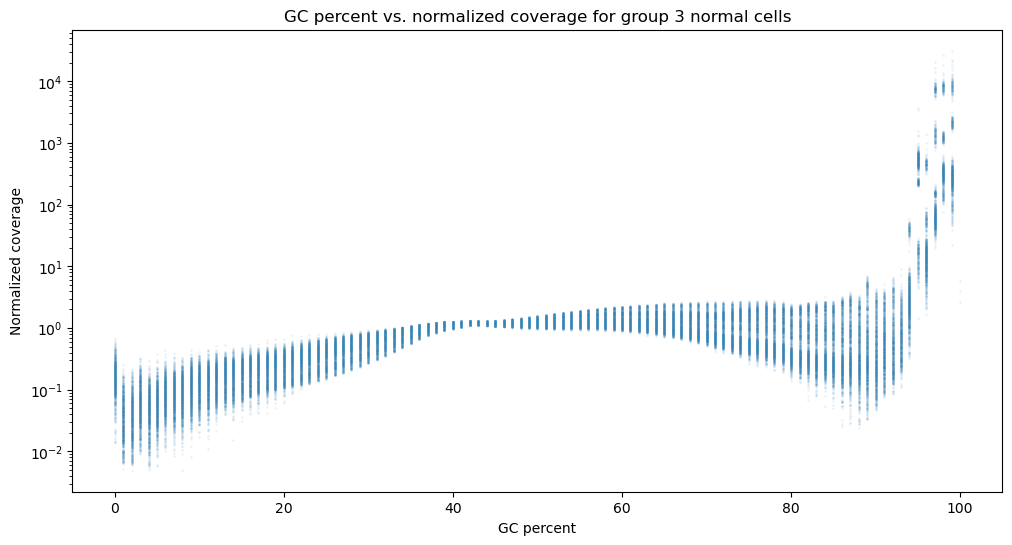

In [8]:
group_gc_plot_df = group_gc_metrics.iloc[:, :-2].reset_index().rename(columns = {"index": "cell_id"})

group_gc_plot_df = group_gc_plot_df.melt(id_vars = "cell_id",
                                         var_name = "GC_percent",
                                         value_name = "normalized_coverage")
group_gc_plot_df["GC_percent"] = group_gc_plot_df["GC_percent"].astype(float)

# Plot one scatterplot of all columns with row numbers on x-axis
plt.figure(figsize = (12, 6))
sns.scatterplot(data = group_gc_plot_df,
                x = "GC_percent",
                y = "normalized_coverage",
                s = 3,
                alpha = 0.1)
plt.yscale('log')
plt.xlabel("GC percent")
plt.ylabel("Normalized coverage")
plt.title(f"GC percent vs. normalized coverage for group {group_num} normal cells")

plt.show()


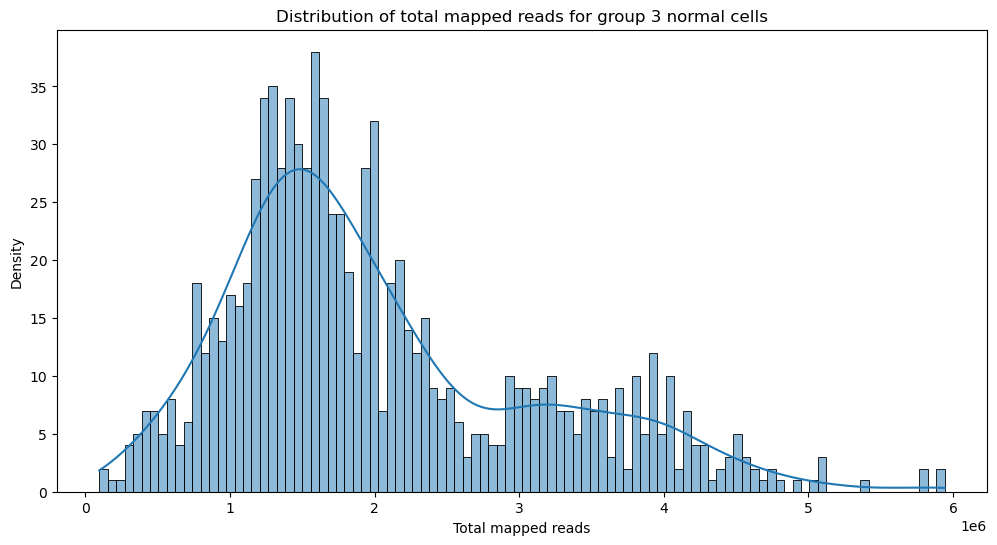

In [23]:
# Histogram of total mapped reads
plt.figure(figsize = (12, 6))
sns.histplot(data = group_normal_cells,
             x = "total_mapped_reads",
             bins = 100,
             kde = True)
plt.xlabel("Total mapped reads")
plt.ylabel("Density")
plt.title(f"Distribution of total mapped reads for group {group_num} normal cells")

plt.show()

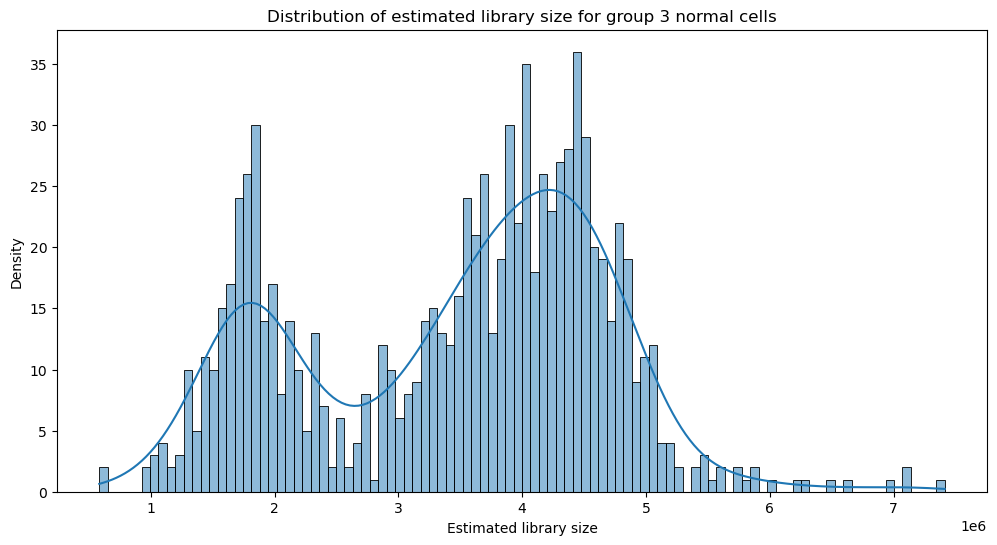

In [24]:
# Histogram of estimated library size
plt.figure(figsize = (12, 6))
sns.histplot(data = group_normal_cells,
             x = "estimated_library_size",
             bins = 100,
             kde = True)
plt.xlabel("Estimated library size")
plt.ylabel("Density")
plt.title(f"Distribution of estimated library size for group {group_num} normal cells")
plt.show()

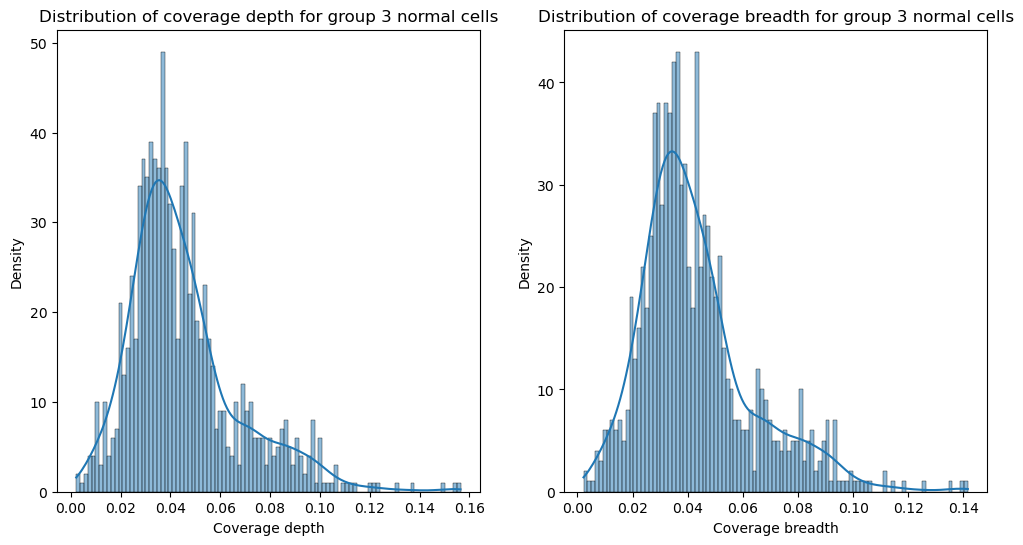

In [25]:
# Histogram of coverage depth and breadth side by side
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data = group_normal_cells,
             x = "coverage_depth",
             bins = 100,
             kde = True)
plt.xlabel("Coverage depth")
plt.ylabel("Density")
plt.title(f"Distribution of coverage depth for group {group_num} normal cells")
plt.subplot(1, 2, 2)
sns.histplot(data = group_normal_cells,
             x = "coverage_breadth",
             bins = 100,
             kde = True)
plt.xlabel("Coverage breadth")
plt.ylabel("Density")
plt.title(f"Distribution of coverage breadth for group {group_num} normal cells")
plt.show()

In [ ]:
# Actual / expected coverage depth
plt.figure(figsize = (12, 6))
sns.histplot(data = group_normal_cells,
             x = "actual_expected_coverage_depth",
             bins = 100,
             kde = True)